# Proyecto Cardio Good Fitness Case Study

Este data set es el resultado de un estudio de mercado de AdRigh al cual le asignaron la tarea de identificar el perfil del cliente típico para cada tipo de caminadora ofrecido por CardioGood Fitness.
Los datos hace parte de las personas que compraron una caminadora tres meses antes en una tiene minorista de CardioGood Fitness.
Las variables del data set son: 
- Product: Producto comprado TM195, TM498 o TM798
- Age: Edad en años
- Gender: Género
- Education: Educación en años
- MaritalStatus: Estado civil, soltero o en pareja
- Usuge: Número promedio de veces que el cliente planea usar la caminadora cada semana
- Fitness: Autoevaluación del estado físico en una escala del 1 al 5, donde 1 es mala forma física y 5 es excelente forma física
- Income: Ingreso familiar anual ($)
- Miles: Número promedio de millas que el cliente espera caminar/correr cada semana

https://www.kaggle.com/datasets/saurav9786/cardiogoodfitness?select=CardioGoodFitness.csv

In [1]:
# importación de librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Dataset Information

In [2]:
data = pd.read_csv("CardioGoodFitness.csv")
data.head

<bound method NDFrame.head of     Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
0     TM195   18    Male         14        Single      3        4   29562   
1     TM195   19    Male         15        Single      2        3   31836   
2     TM195   19  Female         14     Partnered      4        3   30699   
3     TM195   19    Male         12        Single      3        3   32973   
4     TM195   20    Male         13     Partnered      4        2   35247   
..      ...  ...     ...        ...           ...    ...      ...     ...   
175   TM798   40    Male         21        Single      6        5   83416   
176   TM798   42    Male         18        Single      5        4   89641   
177   TM798   45    Male         16        Single      5        5   90886   
178   TM798   47    Male         18     Partnered      4        5  104581   
179   TM798   48    Male         18     Partnered      4        5   95508   

     Miles  
0      112  
1       75  
2     

In [3]:
# tamaño del archivo
data.shape

(180, 9)

In [4]:
# nombre de las columnas
data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [5]:
# información de cada tipo de dato
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [11]:
# principales estadisticas
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [6]:
# revisar nulos 
data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

No hay valores nulos

In [7]:
# valores unicos de cada variable categorica
data.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

De la descripción de los datos y los valores únicos tenemos que Product, Gender, MaritalStatus y Fitness son variables categóricas. Además, la varible Usage se considerará categórica.

In [8]:
data.duplicated().value_counts()

False    180
dtype: int64

No hay valores duplicados

## Análisis exploratorio

In [14]:
# Se divide el dataset en variables categóricas y numéricas 
variablesCategoricas = []
variablesNumericas = []
for k,i in data.nunique().to_dict().items():
    if i > 7:
        variablesNumericas.append(k)
    else:
        variablesCategoricas.append(k)

print("Las variables categoricas son: ", *variablesCategoricas)
print("Las variables numericas son: ", *variablesNumericas)

Las variables categoricas son:  Product Gender MaritalStatus Usage Fitness
Las variables numericas son:  Age Education Income Miles


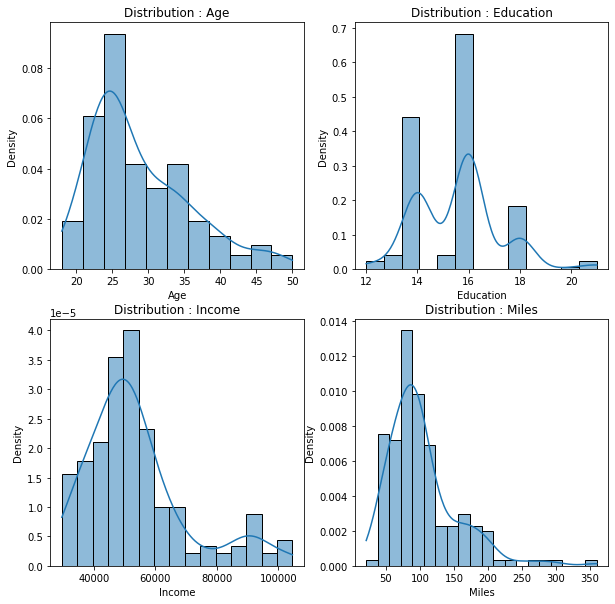

In [17]:
# impresión de la distribución de las variables númericas
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
for i in range(len(variablesNumericas)):
    plt.subplot(2,2,i+1)
    sns.histplot(data[variablesNumericas[i]], stat='density', kde=True)
    title = 'Distribution : ' + variablesNumericas[i]
    plt.title(title)
plt.show()

La mayor concentración de compra se da en edades entre los 20-35 años, con 14 o 16 años de educación, ingresos entre 40.000 y 60.000 y que planean correr entre 50 y 120 millas aproximadamente.

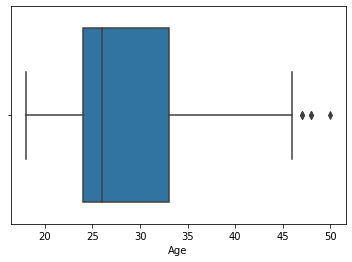

In [18]:
sns.boxplot(x="Age", data=data)
plt.show()

Con el box plot se puede indicar un rango de edad entre 24-33 años aproximadamente.

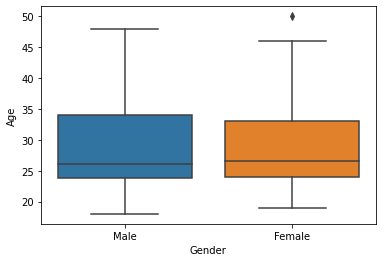

In [19]:
sns.boxplot(x="Gender", y="Age", data=data)
plt.show()

Los rangos de edad entre hombres y mujeres es similar.

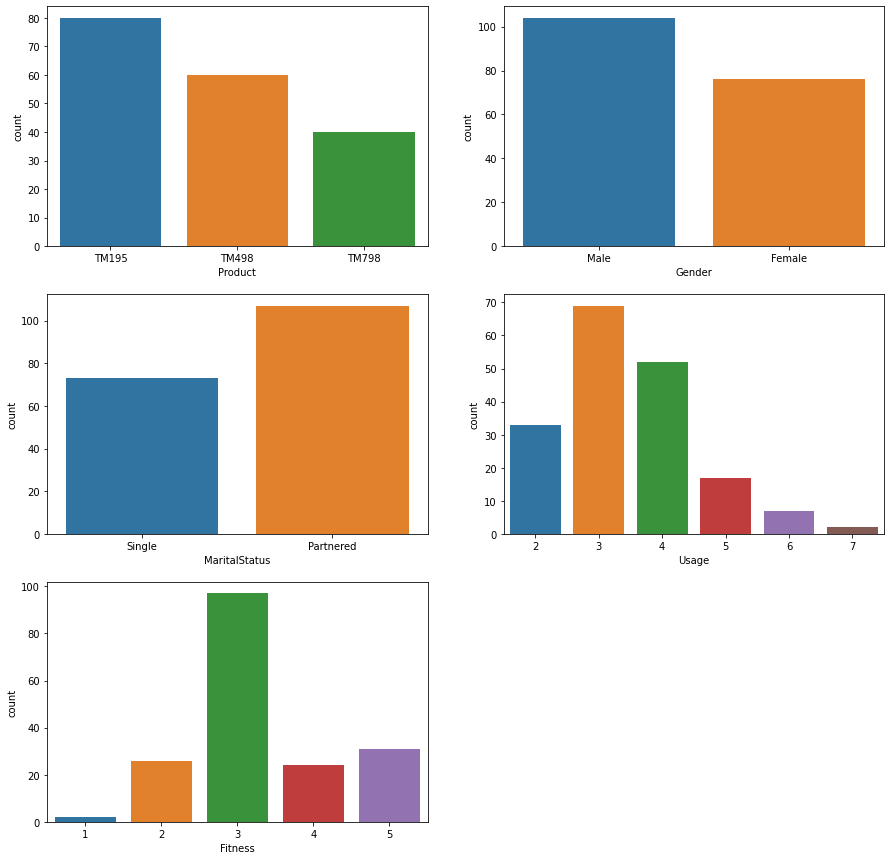

In [30]:
#fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,20))
plt.figure(figsize=(15,15))
for i, col in enumerate(variablesCategoricas):
    plt.subplot(3,2,i+1)
    ax = sns.countplot(data=data, x=col)

- El producto más comprado es el TM195.
- Los hombres compran más que las mujeres.
- Las personas en pareja fueron las que más compraron.
- Los que planean usar las máquinas entre 3 y 4 días compran más.
- Quienes se consideran con un estado físico medio compraron más, seguido de quienes se calificaron con un excelente estado físico.

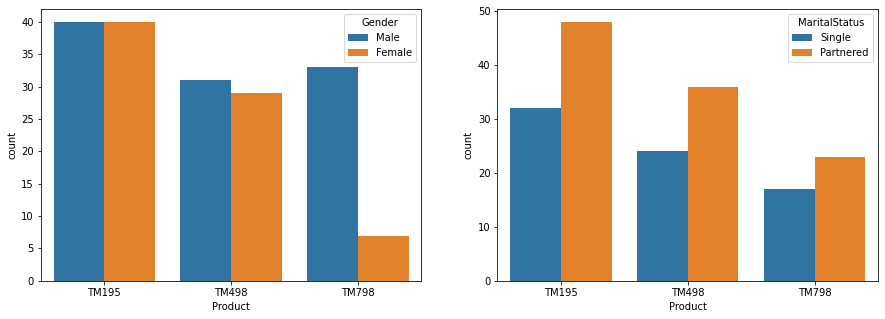

In [69]:
fig = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=data, x="Product", hue="Gender")

plt.subplot(1,2,2)
sns.countplot(data=data, x="Product", hue="MaritalStatus")
plt.show()

- El producto TM195 es igual de comprado por hombres y mujeres, sin embargo se ve una clara diferencia con el producto TM798 donde en su mayoría lo compran hombres.
- Las caminadores TM195 son las más compradas tanto por solteros como en pareja.

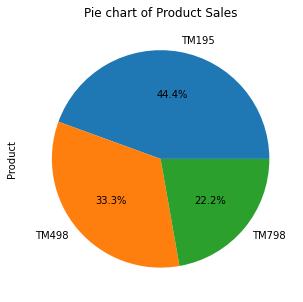

In [80]:
plt.figure(figsize=(5, 5))
data['Product'].value_counts().plot.pie(autopct='%1.1f%%')
#plt.pie(data["Product"].value_counts(), autopct='%0.1f%%')
plt.title("Pie chart of Product Sales")
plt.show()

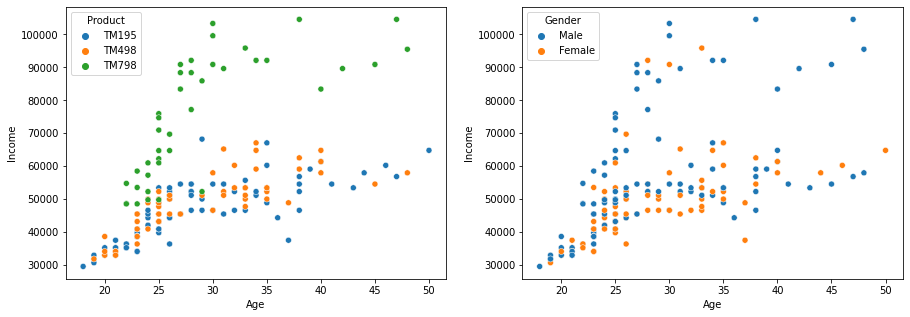

In [67]:
fig = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x='Age', y='Income', hue="Product", data=data)

plt.subplot(1,2,2)
sns.scatterplot(x='Age', y='Income', hue="Gender", data=data)
plt.show()

- Hay una relación directa, a mayor edad, mayores ingresos.
- Los compradores de las cominadoras TM195 y TM498 tienen ingresos medios y preferencias similares por estos dos productos, pero las personas con ingresos superiores tienen una clara preferencia por las cominadoras TM498 y en su mayoría son hombres

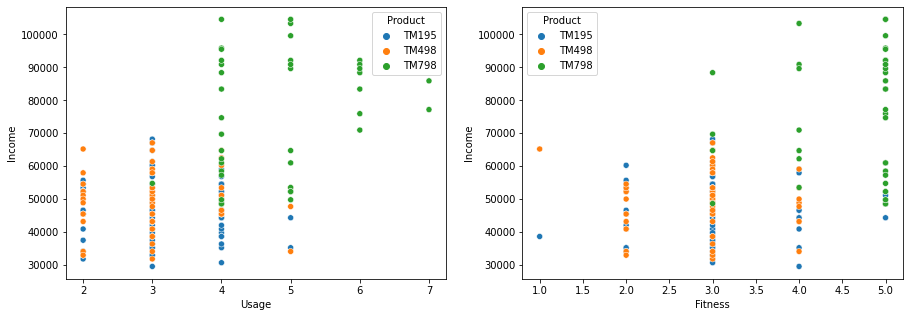

In [68]:
fig = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x='Usage', y='Income', hue="Product" ,data=data)

plt.subplot(1,2,2)
sns.scatterplot(x='Fitness', y='Income', hue="Product" ,data=data)
plt.show()

- Las personas con mayores ingresos afirmaron usar más días la caminadora TM798 y además se consideran un excelente estado físico.
- Los clientes para las caminadoras TM498 y TM195 son similares, se consideran un estado fisico regular y afirmaron usarlas de 2-3 días a la semana.

## Conclusiones

Caminadora TM798
- Los potenciales clientes de las caminadoras TM798 tienen ingresos superiores, mayor a 60.000.
- El rango de edad se encuentra entre los 23 y 35 años aproximadamente y es similar a las demás.

El perfil de los clientes para las caminadoras TM195 y TM498, es similar.

El rango de edad es similar en todas las compras.
Hay más compradores hombres.